<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 00 Dataset Download and Examination


### Riccardo Spolaor (864877)

</center>

# Scaricare il dataset e rendere i dati facilmente accessibili

Il primo step consiste nello scaricare i vari dataset, importarli in oggetti DataFrame della libreria pandas ed unirli in un solo DataFrame.

Tengo traccia dei differenti dataset scaricati assegnando ad ognuno una feature ***csvID***.

Ignoro i dati dell'anno 2000 in quanto sono privi di informazioni riguardo alle scommesse.

In [1]:
import urllib.request, zipfile, pandas
import numpy as np
%matplotlib inline

In [2]:
def get_file(url):
    filehandle, _ = urllib.request.urlretrieve(url)
    zip_file_obj = zipfile.ZipFile(filehandle, 'r')
    file = zip_file_obj.open(zip_file_obj.namelist()[0])
    return file

dataframe = pandas.DataFrame()
dataframe.insert(0, column ='csvID', value = 0)

for date in range(2001,2019+1):
    file = get_file('http://tennis-data.co.uk/' + str(date) + '/' + str(date) + '.zip')
    dataframe = dataframe.append(pandas.read_excel(file).assign(csvID = date-2001), sort = False, ignore_index = True)


dataframe.head()

,csvID,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataframe.columns.values

array(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series',
       'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank',
       'LRank', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5',
       'L5', 'Wsets', 'Lsets', 'Comment', 'CBW', 'CBL', 'GBW', 'GBL',
       'IWW', 'IWL', 'SBW', 'SBL', 'B365W', 'B365L', 'B&WW', 'B&WL',
       'EXW', 'EXL', 'PSW', 'PSL', 'WPts', 'LPts', 'UBW', 'UBL', 'LBW',
       'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'], dtype=object)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 55 columns):
csvID         51945 non-null int64
ATP           51945 non-null float64
Location      51945 non-null object
Tournament    51945 non-null object
Date          51945 non-null datetime64[ns]
Series        51945 non-null object
Court         51945 non-null object
Surface       51945 non-null object
Round         51945 non-null object
Best of       51945 non-null float64
Winner        51945 non-null object
Loser         51945 non-null object
WRank         51926 non-null float64
LRank         51854 non-null object
W1            51675 non-null float64
L1            51677 non-null float64
W2            51173 non-null object
L2            51174 non-null object
W3            24049 non-null object
L3            24048 non-null object
W4            4729 non-null float64
L4            4729 non-null float64
W5            1795 non-null float64
L5            1795 non-null float64
Wsets         5

# Correzioni Preliminari

## Controllo dei tipi

Controllo se alcune feature hanno assegnati tipi differenti da quelli attesi e correggo eventuali valori errati

In [5]:
print('Feature di tipo Object:\n', dataframe.select_dtypes(exclude= np.number).columns.tolist())

dataframe.select_dtypes(exclude= np.number).head()

Feature di tipo Object:
 ['Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Winner', 'Loser', 'LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'Comment', 'EXW']


,Location,Tournament,Date,Series,Court,Surface,Round,Winner,Loser,LRank,W2,L2,W3,L3,Lsets,Comment,EXW
0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Clement A.,Gaudenzi A.,101,6,0,6,3,1,Completed,NaN
1,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Goldstein P.,Jones A.,442,6,2,NaN,NaN,0,Completed,NaN
2,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Haas T.,Smith L.,485,6,3,NaN,NaN,0,Completed,NaN
3,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Henman T.,Rusedski G.,69,7,6,NaN,NaN,0,Completed,NaN
4,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Hewitt L.,Arthurs W.,83,6,3,NaN,NaN,0,Completed,NaN


***EXW, LRank, W2, L2, W3, L3, Lsets*** presentano valori numerici, ma sono categorizzati come *Object*.

Controllo quali sono i valori non numerici che non permettono il corretto casting a float e procedo alla loro correzione

In [6]:
import numbers

def checkValues(attribute_names):
    for a in attribute_names:
        print('"'+a+'": ', 'Wrong Values -> ' , set([x for x in dataframe[a] if not isinstance(x, numbers.Number)]))
    
checkValues(['LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'EXW'])

"LRank":  Wrong Values ->  {'NR'}
"W2":  Wrong Values ->  {' '}
"L2":  Wrong Values ->  {' '}
"W3":  Wrong Values ->  {' '}
"L3":  Wrong Values ->  {' '}
"Lsets":  Wrong Values ->  {'`1'}
"EXW":  Wrong Values ->  {'2.,3'}


In [7]:
import re

def reassignNans(attribute_names):
    for a in attribute_names:
        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
        dataframe.loc[dataframe[a].isin(wrong_values), a] = np.nan
        dataframe[a] = dataframe[a].astype(float)

def correctTypos(attribute_names):
    for a in attribute_names:
        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
        indexes = dataframe[dataframe[a].isin(wrong_values)].index.values
        dataframe.iloc[indexes]
        for i in indexes:
            dataframe.iloc[i,dataframe.columns.get_loc(a)] = float(re.sub("[^0-9^.]", "", str(dataframe.iloc[i][a])))            
        dataframe[a] = dataframe[a].astype(float)

In [8]:
print('WRank, LRank, W2, L2, W3 and L3 hanno delle stringhe per rappresentare NaN values.')
print('Setto queste stringhe a NaN e assegno "float" come tipo delle feature:\n')

reassignNans(['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3'])
checkValues(['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3'])

WRank, LRank, W2, L2, W3 and L3 hanno delle stringhe per rappresentare NaN values.
Setto queste stringhe a NaN e assegno "float" come tipo delle feature:

"WRank":  Wrong Values ->  set()
"LRank":  Wrong Values ->  set()
"W2":  Wrong Values ->  set()
"L2":  Wrong Values ->  set()
"W3":  Wrong Values ->  set()
"L3":  Wrong Values ->  set()


In [9]:
print('EXW e Lsets hanno typo.')
print('Corrego i typo e assegno "float" come tipo delle feature:\n')

correctTypos(['EXW', 'Lsets'])
checkValues(['EXW', 'Lsets'])

EXW e Lsets hanno typo.
Corrego i typo e assegno "float" come tipo delle feature:

"EXW":  Wrong Values ->  set()
"Lsets":  Wrong Values ->  set()


## Controllo di typo nel nome dei giocatori

Durante lo svolgimento del progetto ho notato la presenza di alcuni problemi nei nomi dei giocatori (***Winner*** e ***Loser***):
* Alcune stringhe presentano degli spazi alla fine;
* Altre presentano lettere minuscole al posto delle maiuscole (Trasformo tutti i caratteri delle stringhe in maiuscolo);
* Altre ancora presentano problemi differenti come typo o simboli estranei.

Ho proceduto a risolvere alcuni di questi errori.

In [10]:
print('Numero righe con giocatori chiamati: Nadal R.:', dataframe[dataframe['Winner'] == 'Nadal R.'].shape[0])
print('Numero righe con giocatori chiamati: Nadal R. :', dataframe[dataframe['Winner'] == 'Nadal R. '].shape[0])

Numero righe con giocatori chiamati: Nadal R.: 943
Numero righe con giocatori chiamati: Nadal R. : 2


In [11]:
dataframe['Winner'] = dataframe['Winner'].apply(lambda x : x.strip())
dataframe['Loser'] = dataframe['Loser'].apply(lambda x : x.strip())

In [12]:
print('Numero righe con giocatori chiamati: Di Pasquale A.:', dataframe[dataframe['Winner'] == 'Di Pasquale A.'].shape[0])
print('Numero righe con giocatori chiamati: di Pasquale A.:',dataframe[dataframe['Winner'] == 'di Pasquale A.'].shape[0])

Numero righe con giocatori chiamati: Di Pasquale A.: 1
Numero righe con giocatori chiamati: di Pasquale A.: 16


In [13]:
dataframe['Winner'] = dataframe['Winner'].apply(lambda x : x.upper())
dataframe['Loser'] = dataframe['Loser'].apply(lambda x : x.upper())

### Correzioni Manuali:

In [14]:
dataframe.loc[dataframe['Winner'] == 'NADAL-PARERA R.', 'Winner'] = 'NADAL R.'
dataframe.loc[dataframe['Loser'] == 'NADAL-PARERA R.', 'Loser'] = 'NADAL R.'

dataframe.loc[dataframe['Winner'] == 'AL-GHAREEB M.', 'Winner'] = 'AL GHAREEB M.'
dataframe.loc[dataframe['Loser'] == 'AL-GHAREEB M.', 'Loser'] = 'AL GHAREEB M.'

dataframe.loc[dataframe['Winner'] == 'CARRENO-BUSTA P.', 'Winner'] = 'CARRENO BUSTA P.'
dataframe.loc[dataframe['Loser'] == 'CARRENO-BUSTA P.', 'Loser'] = 'CARRENO BUSTA P.'

dataframe.loc[dataframe['Winner'] == 'CHELA J.', 'Winner'] = 'CHELA J.I.'
dataframe.loc[dataframe['Loser'] == 'CHELA J.', 'Loser'] = 'CHELA J.I.'


dataframe.loc[dataframe['Winner'] == 'DEL POTRO J.', 'Winner'] = 'DEL POTRO J. M.'
dataframe.loc[dataframe['Loser'] == 'DEL POTRO J.', 'Loser'] = 'DEL POTRO J. M.'


dataframe.loc[dataframe['Winner'] == 'DEL POTRO J.M.', 'Winner'] = 'DEL POTRO J. M.'
dataframe.loc[dataframe['Loser'] == 'DEL POTRO J.M.', 'Loser'] = 'DEL POTRO J. M.'


dataframe.loc[dataframe['Winner'] == 'FERRERO J.', 'Winner'] = 'FERRERO J.C.'
dataframe.loc[dataframe['Loser'] == 'FERRERO J.', 'Loser'] = 'FERRERO J.C.'


dataframe.loc[dataframe['Winner'] == 'GIMENO D.', 'Winner'] = 'GIMENO-TRAVER D.'
dataframe.loc[dataframe['Loser'] == 'GIMENO D.', 'Loser'] = 'GIMENO-TRAVER D.'

dataframe.loc[dataframe['Winner'] == 'GRANOLLERS-PUJOL G.', 'Winner'] = 'GRANOLLERS PUJOL G.'
dataframe.loc[dataframe['Loser'] == 'GRANOLLERS-PUJOL G.', 'Loser'] = 'GRANOLLERS PUJOL G.'

dataframe.loc[dataframe['Winner'] == 'HAIDER-MAUER A.', 'Winner'] = 'HAIDER-MAURER A.'
dataframe.loc[dataframe['Loser'] == 'HAIDER-MAUER A.', 'Loser'] = 'HAIDER-MAURER A.'


dataframe.loc[dataframe['Winner'] == 'HERNANDEZ-FERNANDEZ J', 'Winner'] = 'HERNANDEZ-FERNANDEZ J.'
dataframe.loc[dataframe['Loser'] == 'HERNANDEZ-FERNANDEZ J', 'Loser'] = 'HERNANDEZ-FERNANDEZ J.'

dataframe.loc[dataframe['Winner'] == 'LISNARD J.', 'Winner'] = 'LISNARD J.R.'
dataframe.loc[dataframe['Loser'] == 'LISNARD J.', 'Loser'] = 'LISNARD J.R.'

dataframe.loc[dataframe['Winner'] == 'MARIN J.A', 'Winner'] = 'MARIN J.A.'
dataframe.loc[dataframe['Loser'] == 'MARIN J.A', 'Loser'] = 'MARIN J.A.'

dataframe.loc[dataframe['Winner'] == 'MUNOZ-DE LA NAVA D.', 'Winner'] = 'MUNOZ DE LA NAVA D.'
dataframe.loc[dataframe['Loser'] == 'MUNOZ-DE LA NAVA D.', 'Loser'] = 'MUNOZ DE LA NAVA D.'

dataframe.loc[dataframe['Winner'] == 'RAMIREZ-HIDALGO R.', 'Winner'] = 'RAMIREZ HIDALGO R.'
dataframe.loc[dataframe['Loser'] == 'RAMIREZ-HIDALGO R.', 'Loser'] = 'RAMIREZ HIDALGO R.'

dataframe.loc[dataframe['Winner'] == 'SANCHEZ DE LUNA J.', 'Winner'] = 'SANCHEZ DE LUNA J.A.'
dataframe.loc[dataframe['Loser'] == 'SANCHEZ DE LUNA J.', 'Loser'] = 'SANCHEZ DE LUNA J.A.'

dataframe.loc[dataframe['Winner'] == 'SCHERRER J.', 'Winner'] = 'SCHERRER J.C.'
dataframe.loc[dataframe['Loser'] == 'SCHERRER J.', 'Loser'] = 'SCHERRER J.C.'

dataframe.loc[dataframe['Winner'] == 'SCHUETTLER P.', 'Winner'] = 'SCHUTTLER P.'
dataframe.loc[dataframe['Loser'] == 'SCHUETTLER P.', 'Loser'] = 'SCHUTTLER P.'

dataframe.loc[dataframe['Winner'] == 'STEBE C-M.', 'Winner'] = 'STEBE C.M.'
dataframe.loc[dataframe['Loser'] == 'STEBE C-M.', 'Loser'] = 'STEBE C.M.'

dataframe.loc[dataframe['Winner'] == 'STRUFF J-L.', 'Winner'] = 'STRUFF J.L.'
dataframe.loc[dataframe['Loser'] == 'STRUFF J-L.', 'Loser'] = 'STRUFF J.L.'

dataframe.loc[dataframe['Winner'] == 'VAN D. MERWE I.', 'Winner'] = 'VAN DER MERWE I.'
dataframe.loc[dataframe['Loser'] == 'VAN D. MERWE I.', 'Loser'] = 'VAN DER MERWE I.'


dataframe.loc[dataframe['Winner'] == 'WANG Y.JR.', 'Winner'] = 'WANG Y. JR.'
dataframe.loc[dataframe['Loser'] == 'WANG Y.JR.', 'Loser'] = 'WANG Y. JR.'


dataframe.loc[dataframe['Winner'] == 'ZAYED M.S.', 'Winner'] = 'ZAYED M. S.'
dataframe.loc[dataframe['Loser'] == 'ZAYED M.S.', 'Loser'] = 'ZAYED M. S.'

dataframe.loc[dataframe['Winner'] == 'ZAYID M. S.', 'Winner'] = 'ZAYED M. S.'
dataframe.loc[dataframe['Loser'] == 'ZAYID M. S.', 'Loser'] = 'ZAYED M. S.'


dataframe.loc[dataframe['Winner'] == 'ZAYID M.S.', 'Winner'] = 'ZAYED M. S.'
dataframe.loc[dataframe['Loser'] == 'ZAYID M.S.', 'Loser'] = 'ZAYED M. S.'

    

# Controllo Feature di Tipo Object

## Comment
La maggior parte delle partite è finita come *Completed*, poche altre partite sono finite come *Retired* o *Walkover*.
Ha senso considerare solo questi tre tipi di output al fine delle analisi

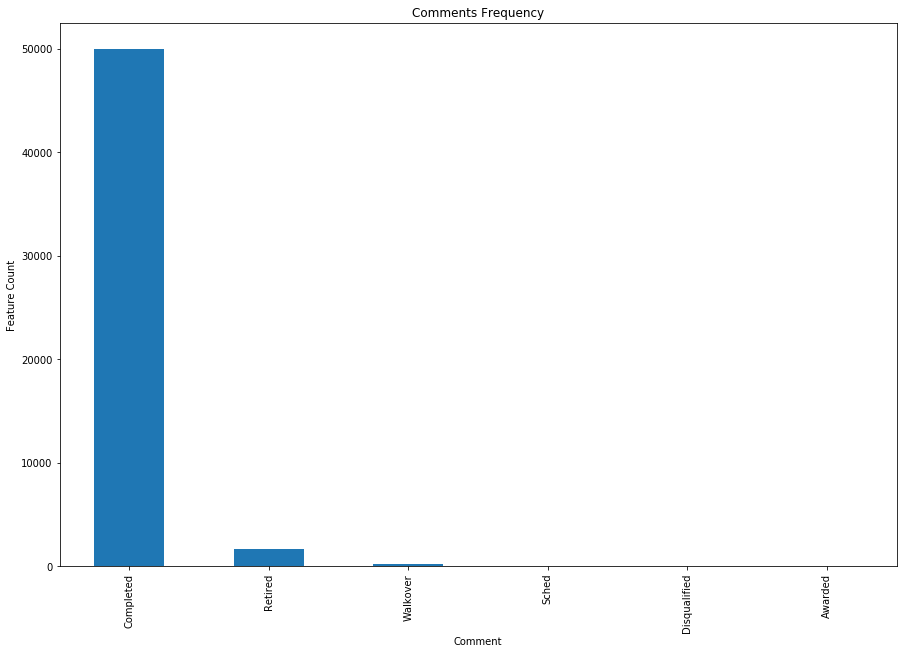

In [15]:
ax = dataframe['Comment'].value_counts().plot.bar(figsize=(15,10), title = 'Comments Frequency')

ax.set(xlabel = 'Comment', ylabel = 'Feature Count')

ax

# Possiamo prendere in considerazione solo Completed Retired e Walkover

## Surfaces

Tutti i tipi di Surface sono rappresentati sufficientemente e possono essere utili al fine dell'analisi

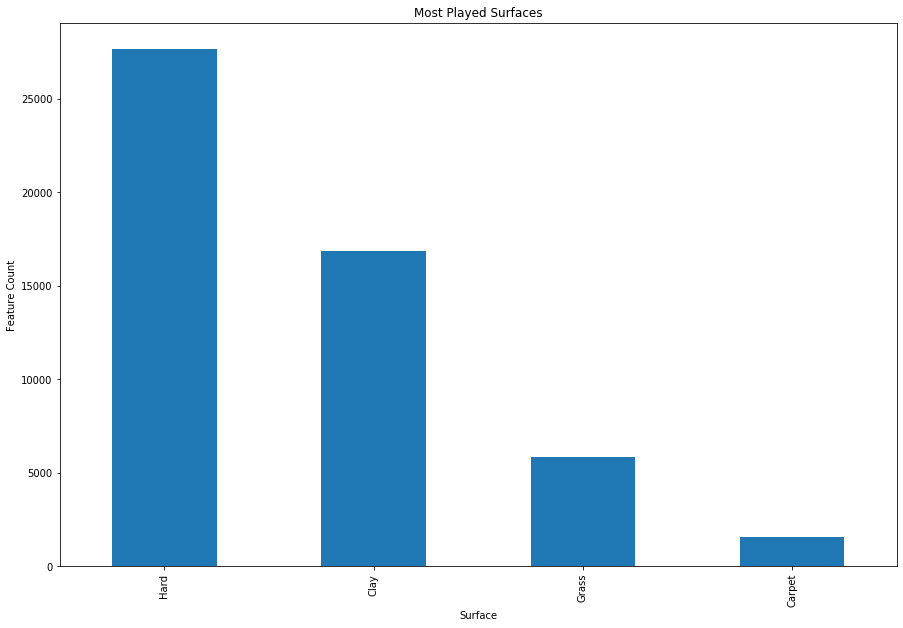

In [16]:
ax = dataframe['Surface'].value_counts().plot.bar(figsize=(15,10), title = 'Most Played Surfaces')

ax.set(xlabel = 'Surface', ylabel = 'Feature Count')

ax
# Possiamo prendere in considerazione tutti i valori

## Court
La maggior parte delle partite è giocata *Outdoor*.

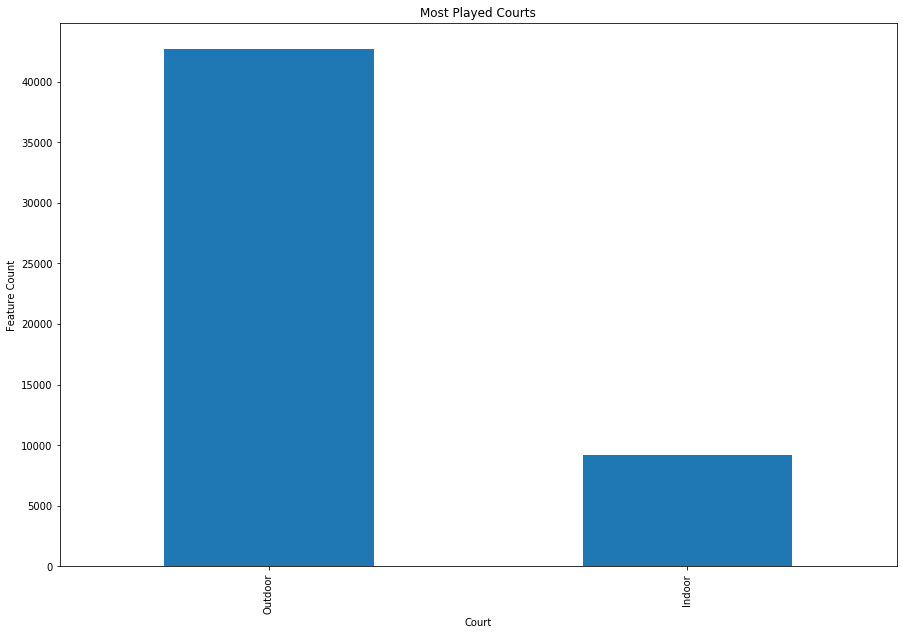

In [17]:
ax = dataframe['Court'].value_counts().plot.bar(figsize=(15,10), title = 'Most Played Courts')

ax.set(xlabel = 'Court', ylabel = 'Feature Count')

ax

# Possiamo prendere in considerazione tutti i valori

## Series
Le feature riguardanti le Series sono poche e facilmente gestibili e ordinabili in base al prestigio per l'analisi.

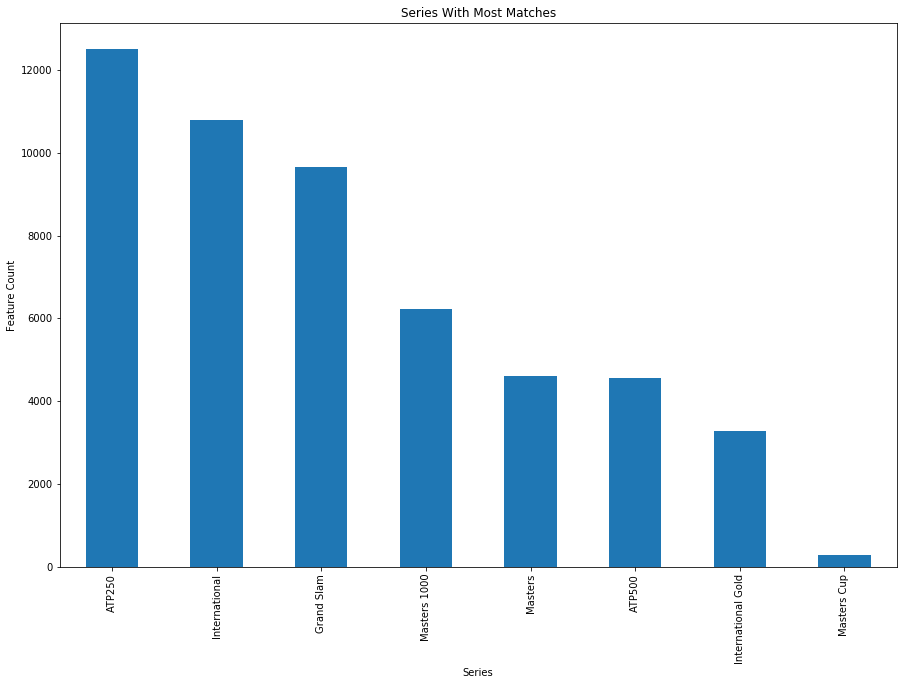

In [18]:
ax = dataframe['Series'].value_counts().plot.bar(figsize=(15,10), title = 'Series With Most Matches')

ax.set(xlabel = 'Series', ylabel = 'Feature Count')

ax

## Location
Le location sono molte, è possibile organizzarle in base al numero di Match giocati.

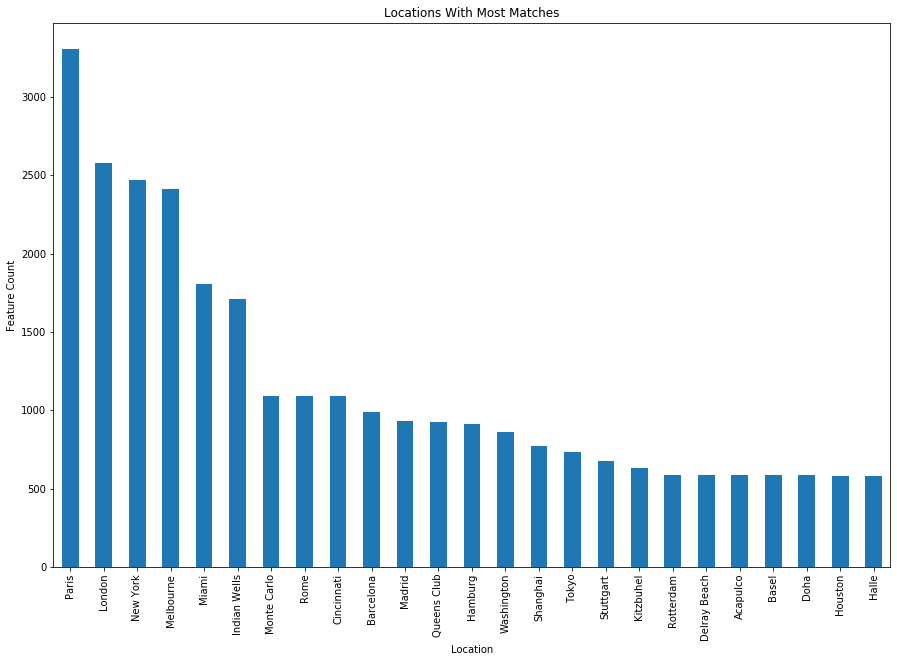

In [19]:
ax = dataframe['Location'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Locations With Most Matches')

ax.set(xlabel = 'Location', ylabel = 'Feature Count')

ax

## Tournament
E' forse possibile considerare l'importanza dei tornei in base al numero di match giocati, oppure in base al loro prestigio.

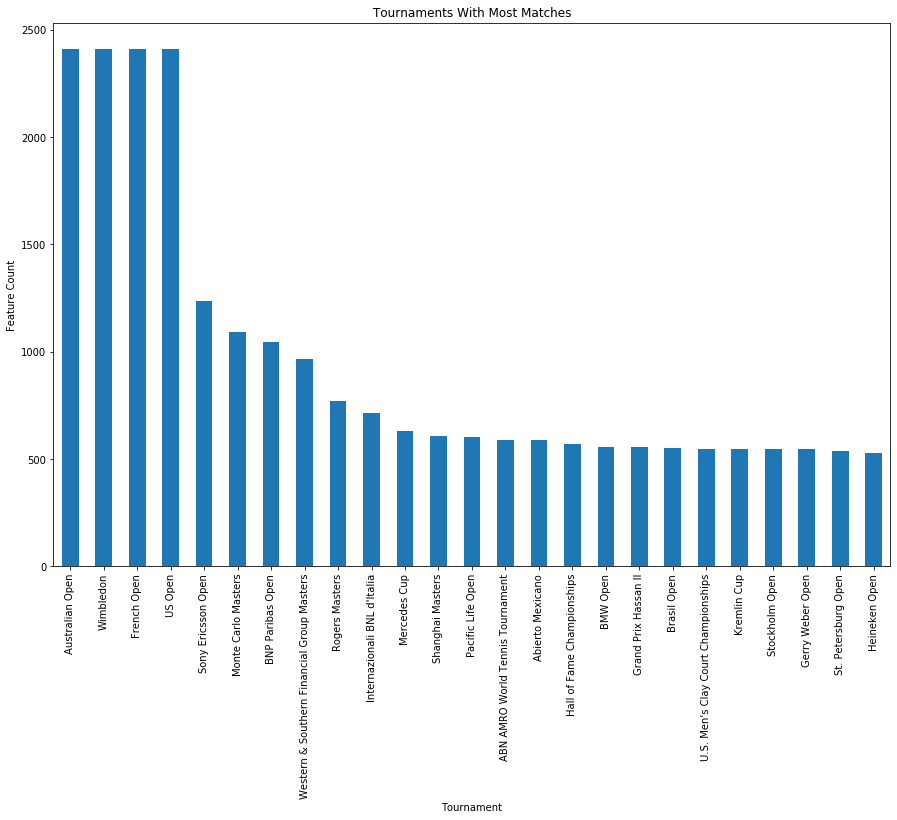

In [20]:
ax = dataframe['Tournament'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Tournaments With Most Matches')

ax.set(xlabel = 'Tournament', ylabel = 'Feature Count')

ax

## Winner e Loser
Possiamo organizzare i giocatori in ordine di maggior differenza vittorie sconfitte come visibile dai successivi grafici

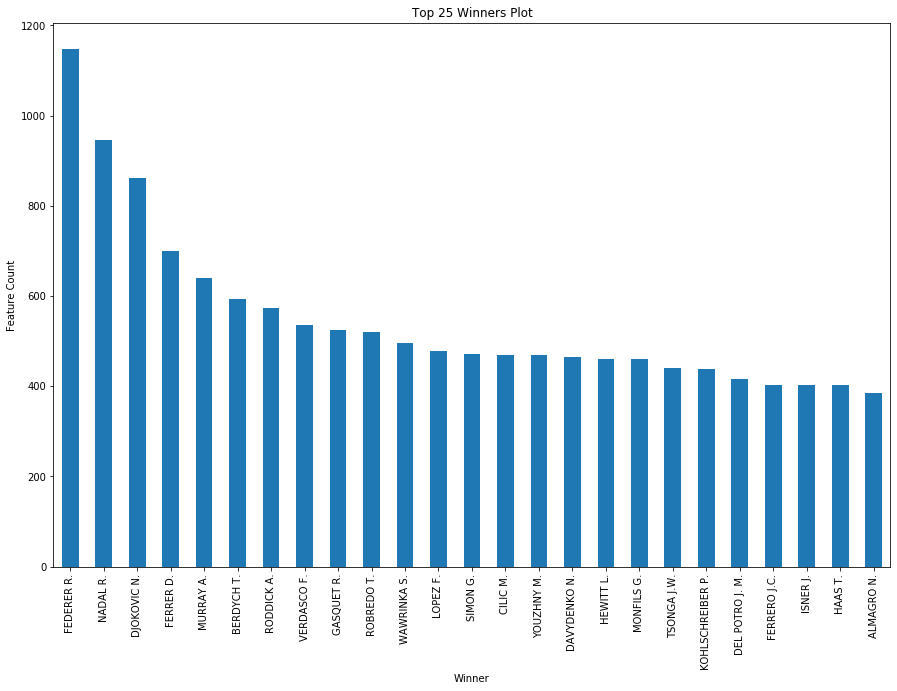

In [21]:
ax = dataframe['Winner'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Top 25 Winners Plot')

ax.set(xlabel = 'Winner', ylabel = 'Feature Count')

ax

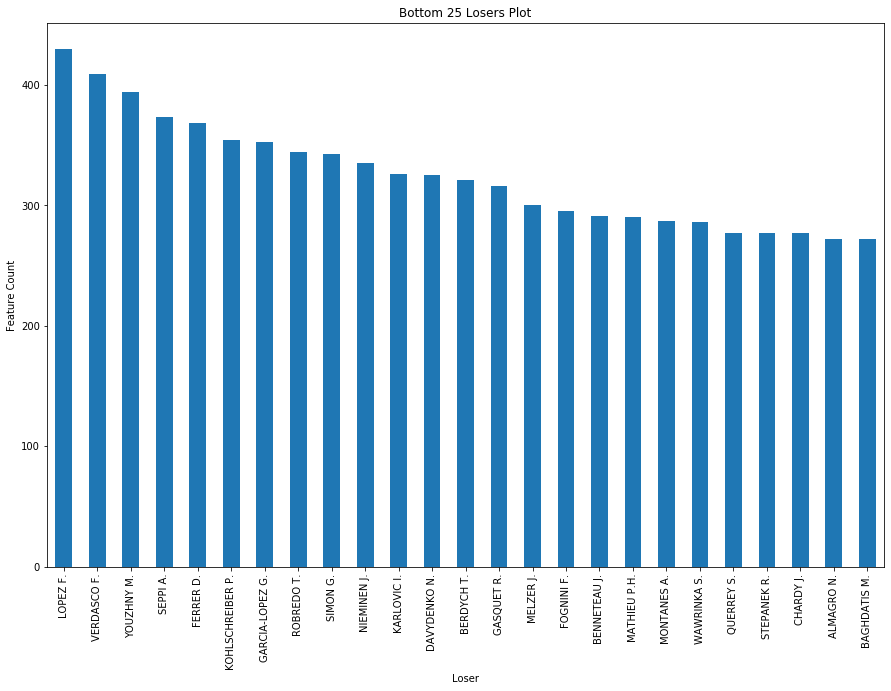

In [22]:
ax = dataframe['Loser'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Bottom 25 Losers Plot')

ax.set(xlabel = 'Loser', ylabel = 'Feature Count')

ax

In [23]:
dataframe.to_csv('./datasets/dataframe00.csv', index = False)